In [2]:
# The following statement will install pandas library. You may need to use pip instead of pip3
# !pip3 install pandas

## import necessary modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(
    filepath_or_buffer= "C:\\Users\\saish\\Desktop\\A1\\a1_data.csv" , # For Windows, use "\\" instead of "/"
    sep = ",", # comma separated file
    header = 0, # field names in the first line. Index starts with 0 in Python
    encoding = "utf-8", # encoding 
    #parse_dates = [1,33] # If there is any date field, put index (indices) of the field(s)
)

## print first 5 lines. If you need more lines, put the number of lines as an argument
## of the head function
print(data.head(10)) 
print()
print(data.shape) ## show the number of rows and columns

   ADAPPT42  ADHECR42  AGE09X  BMINDX  FAMINC09  TOTEXP09  ASPIRIN  No_ASPIRIN
0         3        10    28.0    26.6    121000      1173        0           1
1         6        10    79.0    34.3     49570     14951        1           0
2         1         8    41.0    31.7    248131      3791        0           1
3         5        10    69.0    25.3     11000     58604        0           1
4         4        10    50.0    28.3     41965      6308        0           1
5         5         5    38.0    28.8     44525       701        0           1
6         6        10    48.0    39.1     13200     60058        1           0
7         2         8    25.0    35.2     35498      2284        0           1
8         2         9    36.0    29.5      9664     15279        0           1
9         2         8    23.0    40.7     18320      1229        0           1

(1058, 8)


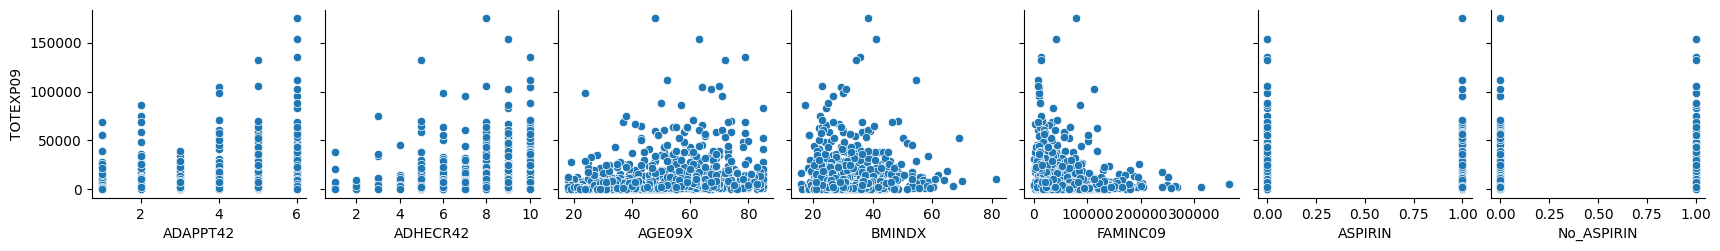

In [4]:
import seaborn as sns

sns.pairplot(data= data,
                  y_vars=["TOTEXP09"],
             
                  x_vars=["ADAPPT42", "ADHECR42", "AGE09X", "BMINDX", "FAMINC09", "ASPIRIN", "No_ASPIRIN"])

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

## syntax of numpy where method: np.where(condition, value if condition is true, value if condition is false)
## combine these two variables into one variable depending on their age.
## Sklearn takes integer as label
data["EXPENDITURE"] = np.where(data['TOTEXP09'] >= data['TOTEXP09'].median() , 1 , 0)
data[['TOTEXP09', 'EXPENDITURE']].head(20)

# separate a dependent variable from independent variables.

data = data.drop('TOTEXP09',  axis=1)

## independent variables
X = data.loc[:, data.columns != "EXPENDITURE" ]

## dependent variable
## Specify the data type. Before specifying, the type was unknown
Y = data["EXPENDITURE"].astype('int')

print(X.head())
print(Y.head())


## test_size will set the ratio of the test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

   ADAPPT42  ADHECR42  AGE09X  BMINDX  FAMINC09  ASPIRIN  No_ASPIRIN
0         3        10    28.0    26.6    121000        0           1
1         6        10    79.0    34.3     49570        1           0
2         1         8    41.0    31.7    248131        0           1
3         5        10    69.0    25.3     11000        0           1
4         4        10    50.0    28.3     41965        0           1
0    0
1    1
2    0
3    1
4    1
Name: EXPENDITURE, dtype: int64
(740, 7)
(318, 7)
(740,)
(318,)


Accuracy: 0.6352201257861635
Precision: 0.6272189349112426
Recall: 0.6666666666666666


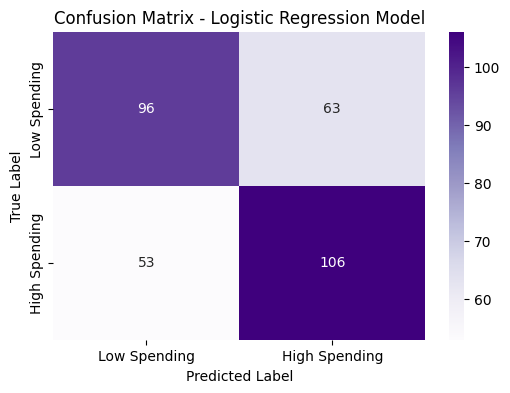

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

## Create a model
clf = LogisticRegression()
clf.fit(X_train, y_train)

## predict target class based on the trained model 
predictions = clf.predict(X_test)

## Calculate accuracy of the classifier
accuracy = accuracy_score(predictions, y_test)

print("Accuracy:", accuracy)

## Calculate precision of the classifier
precision = precision_score(y_pred = predictions, y_true = y_test, pos_label = 1)

print("Precision:", precision)

## Calculate recall of the classifier
recall = recall_score(y_pred = predictions, y_true = y_test, pos_label = 1)

print("Recall:", recall)



# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Low Spending', 'High Spending'], yticklabels=['Low Spending', 'High Spending'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

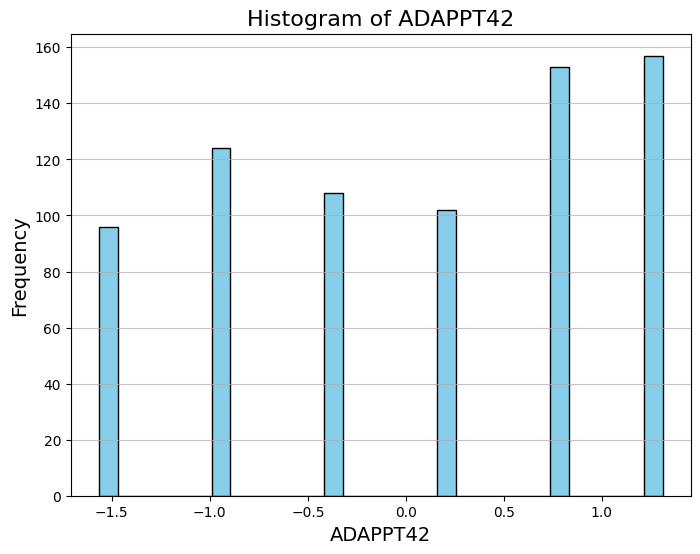

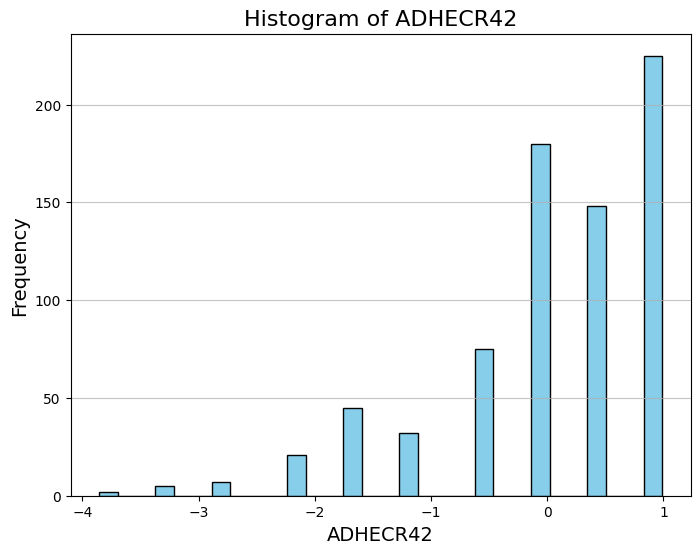

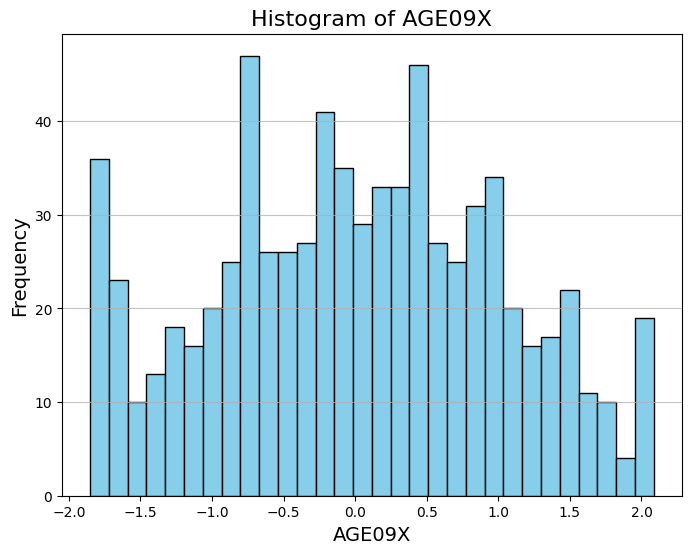

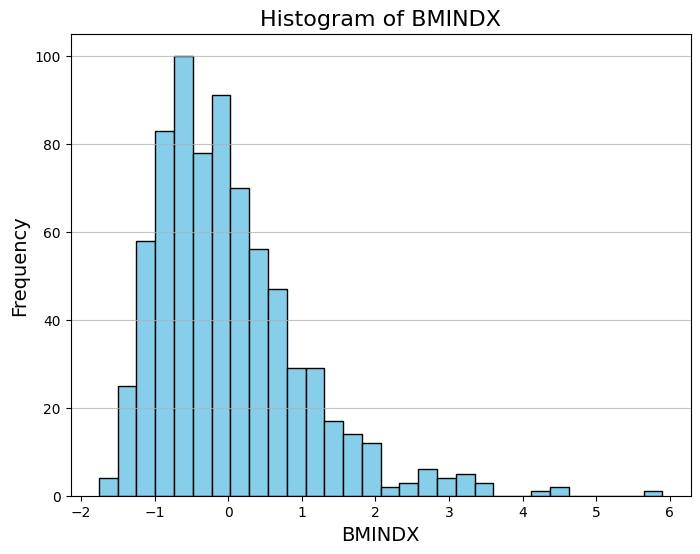

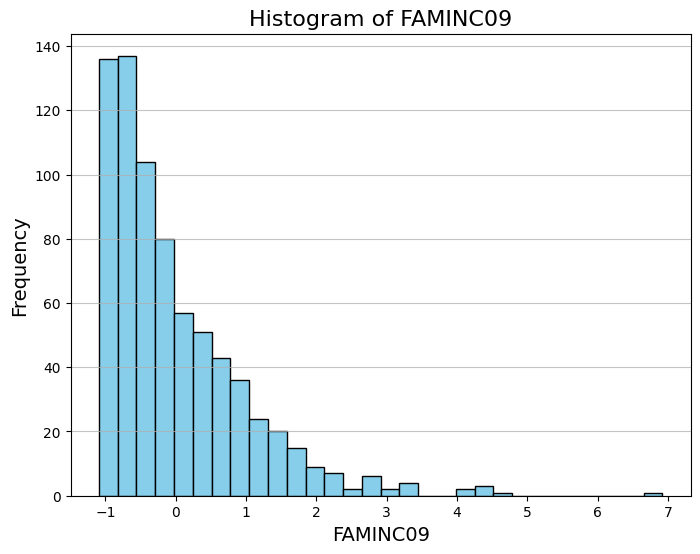

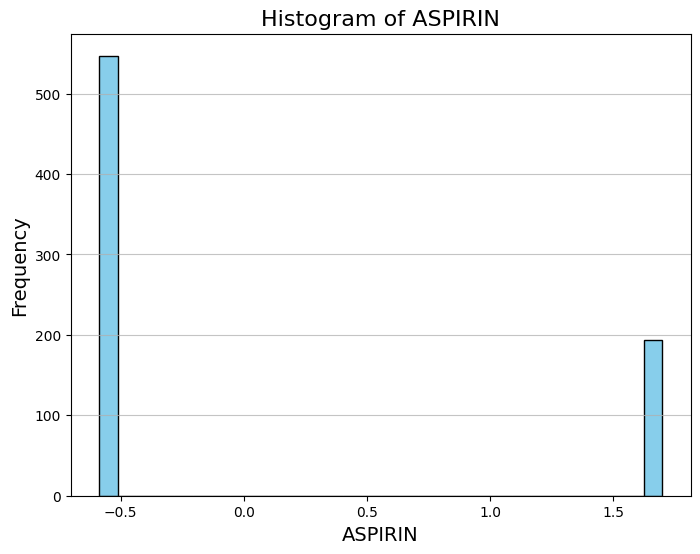

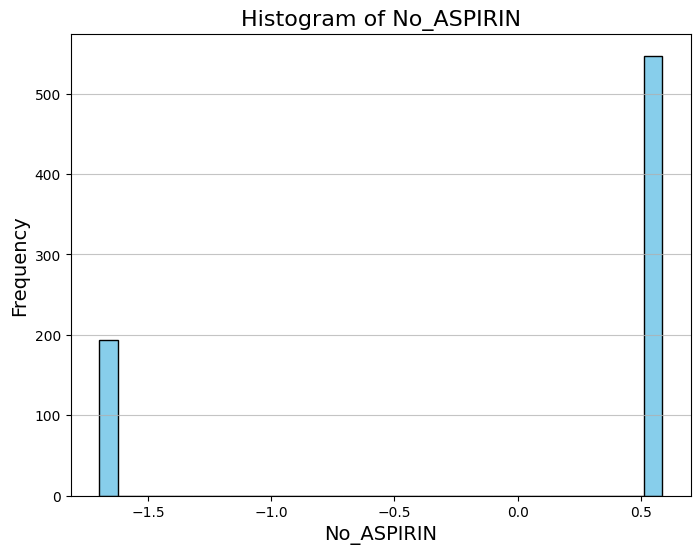

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assume 'data' is a preloaded DataFrame
# Define features and target correctly
X = data.drop(columns=["EXPENDITURE"])  # Ensure "EXPENDITURE" is removed from features
y = data["EXPENDITURE"]

# Store column names before scaling
feature_names = X.columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Convert X_train and X_test back to DataFrames with column names
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

# Select only numerical columns for interaction terms
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))

    # Plot the histogram for each numerical column
    plt.hist(X_train[col], bins=30, color='skyblue', edgecolor='black')

    # Title and labels for the plot
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Grid and style adjustments for better readability
    plt.grid(axis='y', alpha=0.75)

    # Display the plot
    plt.show()


Correlation of features with the target variable (y_train):
ADAPPT42      0.018947
ADHECR42      0.032053
AGE09X        0.049185
BMINDX       -0.001597
FAMINC09      0.008572
ASPIRIN       0.004754
No_ASPIRIN   -0.004754
dtype: float64


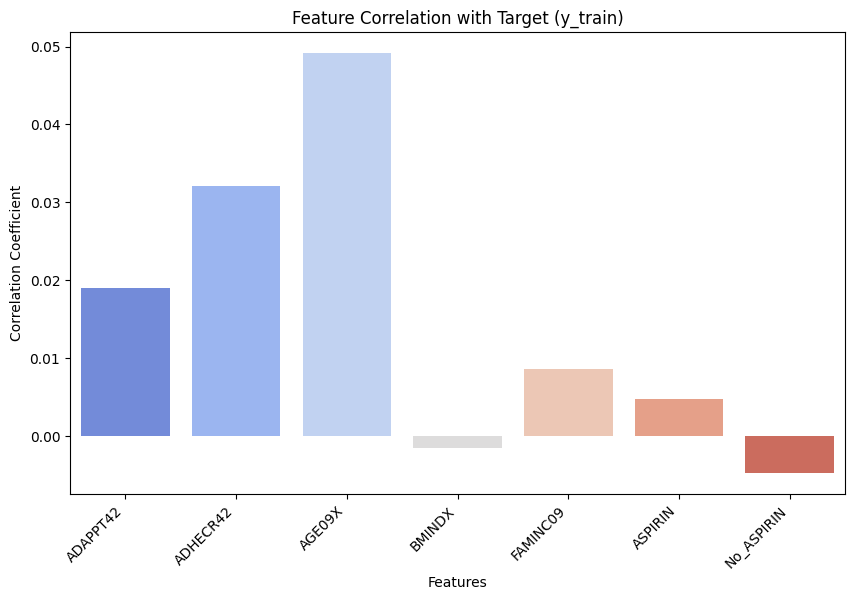


Mutual Information of features with the target variable (y_train):
            Mutual Information
ADAPPT42              0.077154
AGE09X                0.049657
BMINDX                0.025315
No_ASPIRIN            0.017155
ADHECR42              0.000000
FAMINC09              0.000000
ASPIRIN               0.000000


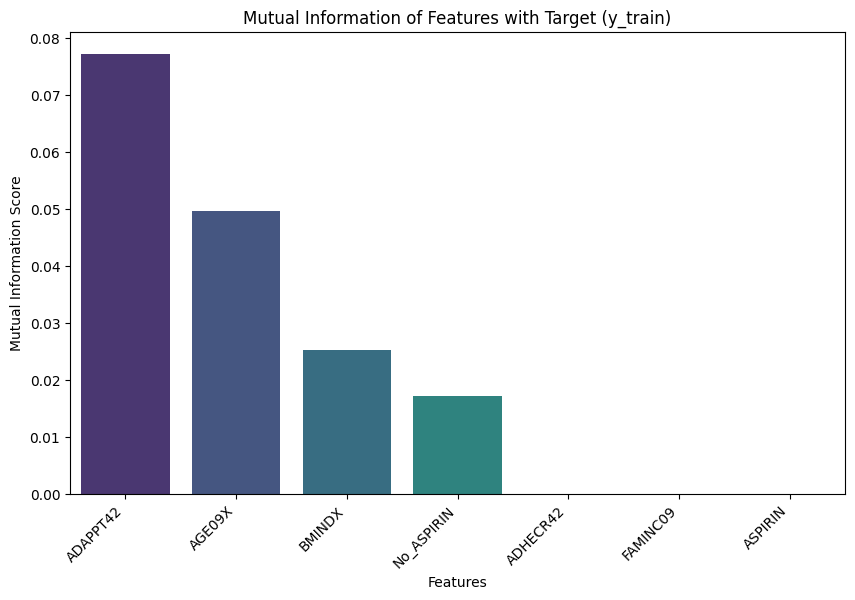

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# 1. Correlation for Continuous Features (Pearson)
correlations = X_train.corrwith(y_train)

# Print Correlation Coefficients
print("Correlation of features with the target variable (y_train):")
print(correlations)

# Visualize Correlation using a Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Feature Correlation with Target (y_train)")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()

# 2. Mutual Information for Feature-Target Relationship
# Check if y_train is categorical or continuous
if y_train.nunique() > 10:  # Assumption: More than 10 unique values means it's continuous
    mi = mutual_info_regression(X_train, y_train)
else:
    mi = mutual_info_classif(X_train, y_train)

# Create a DataFrame to visualize the mutual information scores
mi_df = pd.DataFrame(mi, index=X_train.columns, columns=['Mutual Information'])
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print the Mutual Information scores
print("\nMutual Information of features with the target variable (y_train):")
print(mi_df)

# Visualize the Mutual Information using a Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_df.index, y=mi_df['Mutual Information'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Mutual Information of Features with Target (y_train)")
plt.ylabel("Mutual Information Score")
plt.xlabel("Features")
plt.show()


In [14]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X_train, y_train)

# Store the scores in a DataFrame
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI_Score': mi_scores})

# Sort features by MI score (higher is better)
mi_scores_df = mi_scores_df.sort_values(by='MI_Score', ascending=False)

# Display results
print("Mutual Information Scores for Each Feature:")
print(mi_scores_df)

# Define threshold for removing noisy features (features with very low MI)
mi_threshold = 0.001
noisy_features = mi_scores_df[mi_scores_df['MI_Score'] < mi_threshold]['Feature'].tolist()
print("Noisy Features to Drop:", noisy_features)

# Drop noisy features from training and test sets
X_train_f1 = X_train.drop(columns=noisy_features)
X_test_f1 = X_test.drop(columns=noisy_features)

# Print new shape after dropping noisy features
print("New shape after dropping noisy features:", X_train_f1.shape)


Mutual Information Scores for Each Feature:
      Feature  MI_Score
0    ADAPPT42  0.112002
5     ASPIRIN  0.038655
2      AGE09X  0.034337
3      BMINDX  0.032125
6  No_ASPIRIN  0.018865
1    ADHECR42  0.002991
4    FAMINC09  0.000000
Noisy Features to Drop: ['FAMINC09']
New shape after dropping noisy features: (740, 6)


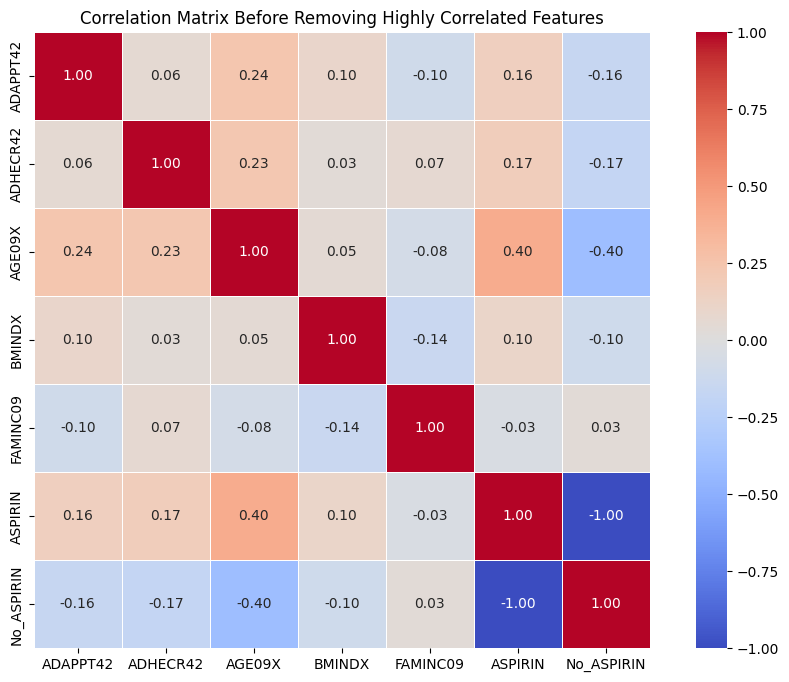

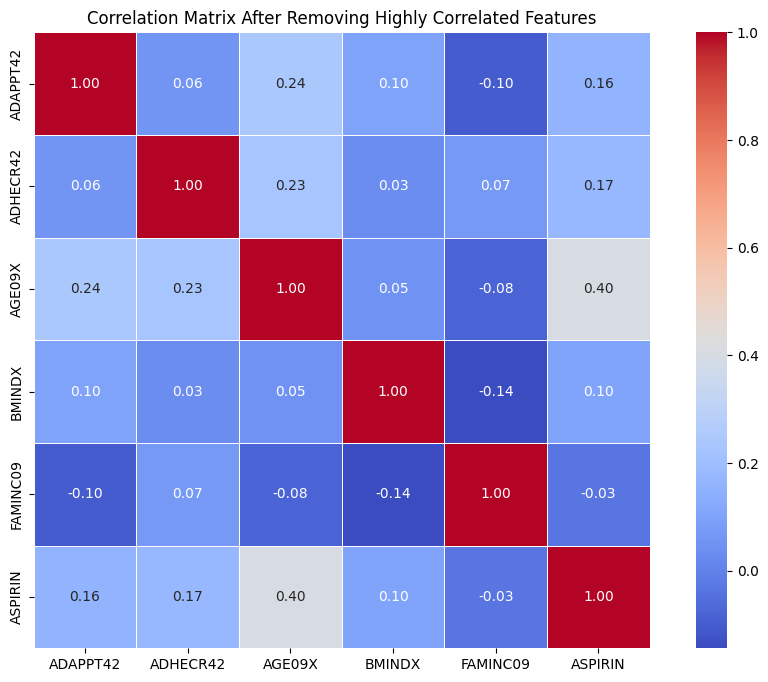


Removed highly correlated features: {'No_ASPIRIN'}


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Compute the correlation matrix before removing highly correlated features
corr_matrix_before = X_train.corr()

# Step 2: Create a heatmap for the correlation matrix before removing features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_before, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix Before Removing Highly Correlated Features")
plt.show()

# Function to remove highly correlated features
def remove_highly_correlated_features(data, threshold=0.9):
    """Removes features that have a correlation higher than the threshold."""
    corr_matrix = data.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find columns with correlation above the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop highly correlated columns
    return data.drop(columns=to_drop, errors='ignore')

# Step 3: Remove highly correlated features
X_train_no_corr = remove_highly_correlated_features(X_train, threshold=0.9)

# Step 4: Compute the correlation matrix after removing highly correlated features
corr_matrix_after = X_train_no_corr.corr()

# Step 5: Create a heatmap for the correlation matrix after removing features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_after, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix After Removing Highly Correlated Features")
plt.show()

# Print removed features for reference
removed_features = set(X_train.columns) - set(X_train_no_corr.columns)
print("\nRemoved highly correlated features:", removed_features)


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Select numerical features from the original dataset (assuming they are in X_train)
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 2: Initialize PolynomialFeatures with degree=2 (you can change the degree to capture higher-order interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)  # Set include_bias=False to avoid adding a bias column (all ones)

# Step 3: Apply PolynomialFeatures to the selected numerical features
X_train_poly = poly.fit_transform(X_train[numerical_features])

# Step 4: Create a DataFrame for the new polynomial features
poly_feature_names = poly.get_feature_names_out(numerical_features)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)

# Step 5: Standardize the polynomial features (important for models like logistic regression, SVM, etc.)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly_df)

# Optionally: Add the polynomial features back to the original dataset if needed
X_train_with_poly = pd.DataFrame(X_train_poly_scaled, columns=poly_feature_names)

# Combine original features (if needed) with the new polynomial features
X_train_final = pd.concat([X_train, X_train_with_poly], axis=1)

# Print the final DataFrame (you can inspect the new polynomial features)
print(X_train_final.head())


   ADAPPT42  ADHECR42    AGE09X    BMINDX  FAMINC09   ASPIRIN  No_ASPIRIN  \
0 -0.990480  0.452886 -0.852291  2.165466 -0.841609 -0.588265    0.588265   
1  0.734978  0.991866  0.910495  0.338088 -0.893585  1.699913   -1.699913   
2  0.734978 -2.242014  0.734216 -1.020731 -0.547980 -0.588265    0.588265   
3 -0.415328 -2.242014 -0.852291 -0.645884 -0.576188 -0.588265    0.588265   
4  1.310130 -0.625074 -0.264696 -0.177326  0.809354 -0.588265    0.588265   

   ADAPPT42  ADHECR42    AGE09X  ...  BMINDX^2  BMINDX FAMINC09  \
0 -1.019672  0.433568 -0.868464  ...  1.586745        -1.976425   
1  0.717605  0.987695  0.901796  ... -0.378840        -0.186788   
2  0.717605 -2.337071  0.724770  ...  0.019691         0.827234   
3 -0.440580 -2.337071 -0.868464  ... -0.248717         0.606892   
4  1.296697 -0.674688 -0.278377  ... -0.414440        -0.000109   

   BMINDX ASPIRIN  BMINDX No_ASPIRIN  FAMINC09^2  FAMINC09 ASPIRIN  \
0       -1.341365           1.341365   -0.103295          0.5461

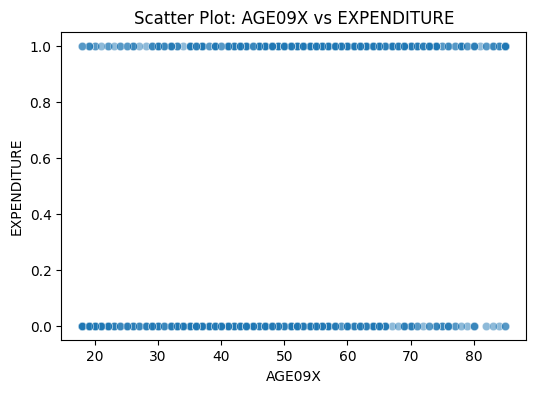

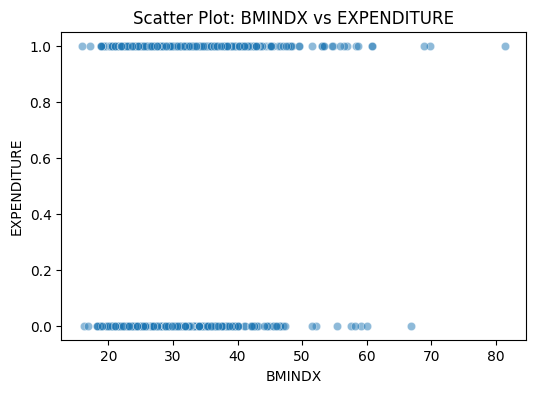

In [24]:
# Define numerical and categorical features
numerical_features = ['AGE09X', 'BMINDX']
categorical_features = ['ADAPPT42', 'ADHECR42', 'ASPIRIN']

# Scatter plots to check for non-linearity
for column in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train_f2[column], y=y_train, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("EXPENDITURE")
    plt.title(f"Scatter Plot: {column} vs EXPENDITURE")
    plt.show()

# Apply Polynomial Transformation to numerical features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_f2[numerical_features])
X_test_poly = poly.transform(X_test_f2[numerical_features])

# Convert transformed data into DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(numerical_features))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(numerical_features))

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Example data loading (ensure your data is loaded properly here)
# data = pd.read_csv("your_data.csv")  # Replace with actual data loading step

# Check if 'TOTEXP09' exists in the dataset
if 'TOTEXP09' in data.columns:
    # Combine 'TOTEXP09' values into a new column 'EXPENDITURE'
    data["EXPENDITURE"] = np.where(data['TOTEXP09'] >= data['TOTEXP09'].median(), 1, 0)
    data = data.drop('TOTEXP09', axis=1)  # Drop the 'TOTEXP09' column after processing

# Independent and dependent variables
X = data.loc[:, data.columns != "EXPENDITURE"]
Y = data["EXPENDITURE"].astype('int')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Now using X_train and X_test as X_train_f2 and X_test_f2 for further processing
X_train_f2 = X_train
X_test_f2 = X_test

# Identify categorical features (those with type 'object' or 'category')
categorical_features = X_train_f2.select_dtypes(include=['object', 'category']).columns.tolist()

# If no categorical features, create empty dataframes for categorical features
X_train_cat = pd.DataFrame()
X_test_cat = pd.DataFrame()

if categorical_features:
    # One-Hot Encode categorical features (drop_first=True to avoid the dummy variable trap)
    X_train_cat = pd.get_dummies(X_train_f2[categorical_features].astype(str), drop_first=True, dtype=int).reset_index(drop=True)
    X_test_cat = pd.get_dummies(X_test_f2[categorical_features].astype(str), drop_first=True, dtype=int).reset_index(drop=True)

    # Ensure that both train and test data have the same columns for the categorical variables
    X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join="outer", axis=1, fill_value=0)

# Combine One-Hot Encoded categorical features with the numerical features
X_train_final = pd.concat([X_train_f2.drop(columns=categorical_features), X_train_cat], axis=1)
X_test_final = pd.concat([X_test_f2.drop(columns=categorical_features), X_test_cat], axis=1)

# Fill any missing values (if encoding caused them) with 0
X_train_final.fillna(0, inplace=True)
X_test_final.fillna(0, inplace=True)

# Print the final shapes of the datasets
print(f"Final Training Data Shape: {X_train_final.shape}")
print(f"Final Testing Data Shape: {X_test_final.shape}")


Final Training Data Shape: (740, 7)
Final Testing Data Shape: (318, 7)


In [22]:
from sklearn.preprocessing import StandardScaler

# Step 1: Identify numerical features (excluding categorical features)
numerical_features = X_train_f2.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Standardize numerical features
scaler = StandardScaler()

# Apply StandardScaler to the numerical features (both train and test)
X_train_num_scaled = scaler.fit_transform(X_train_f2[numerical_features])
X_test_num_scaled = scaler.transform(X_test_f2[numerical_features])

# Convert the scaled features back to DataFrame to keep column names
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns=numerical_features)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns=numerical_features)

# Step 3: Concatenate the standardized numerical features with the one-hot encoded categorical features
X_train_final = pd.concat([X_train_num_scaled_df, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num_scaled_df, X_test_cat], axis=1)

# Step 4: Fill any remaining NaN values with 0
X_train_final.fillna(0, inplace=True)
X_test_final.fillna(0, inplace=True)

# Print the final shapes of the datasets
print(f"Final Training Data Shape after Standardization: {X_train_final.shape}")
print(f"Final Testing Data Shape after Standardization: {X_test_final.shape}")


Final Training Data Shape after Standardization: (740, 7)
Final Testing Data Shape after Standardization: (318, 7)


Accuracy of the Logistic Regression model: 0.7044


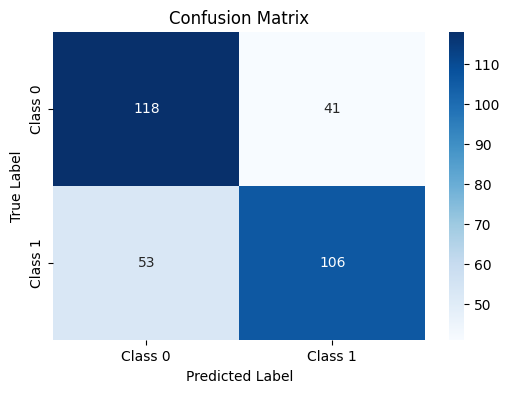

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the Logistic Regression model
clf = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence

# Step 2: Train the model
clf.fit(X_train_final, y_train)

# Step 3: Make predictions on the test set
y_pred = clf.predict(X_test_final)

# Step 4: Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

# Step 5: Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
